In [2]:
%matplotlib inline
from pylab import *
import scipy
import scipy.misc

# Introdução

O entendimento da complexidade de algoritmos é uma tarefa chave no desenvolvimento de sistemas e algoritmos capazes não apenas de fornecer a saída correta, mas de acordo com restrições impostas pelo contexto ou pelo domínio. Para exemplificar esta afirmação, tomemos como exemplo um algoritmo que precisa encontrar um número $n$ em um vetor $D$. O algoritmo deve retornar um par ($a$, $b$) onde: 

* $a$ : Um valor booleano indicando se o número $n$ foi encontrado; e
* $b$ : Um número inteiro indicando a posição de $n$ no vetor.

Uma possível implementação deste algoritmo é a seguinte (em pseudo-código).

**Algoritmo 1.1: `Encontra(n,D)`**

```java
Encontra(n, D)
i = 0 
para d em D faça
      se (d == n) então
          retorne (True, d)
      fim-se
      i = i + 1
fim-para
retorne (False, 0)
```

Chama-se **operação fundamental** a operação principal do algoritmo. Neste caso, digamos que a operação fundamental é a igualdade (comparação) da linha 4.

É possível perceber que a quantidade de **operações fundamentais** varia conforme o tamanho de $D$ ($|D|$). Podemos analisar das seguintes formas:

1. Considerando $n \in D$:
    1. Se $|D| = 1$, então a operação fundamental será executada 1 vez; e
    2. Se $|D| = 10$, então a operação fundamental será executada, no máximo, 10 vezes. 
2. Considerando $n \not\in D$:
    1. Independentemente $|D|$, a operação fundamental será executada $|D|$ vezes.
    
** Exercício 1.1:** Considerando as afirmações anteriores, qual a diferença entre $n$ estar no início ou no final de $D$? Demonstre e justifique a afirmação 1B.

A análise destes casos e a representação disso seguindo um formalismo é o que chamamos **Análise de Algoritmos**. Existem diversas formas de analisar algoritmos, ou a computação deles, como considerar o tempo de execução e o espaço (a memória necessária para a execução do algoritmo). Neste curso estamos mais interessados na primeira forma, a análise do tempo de execução. 

De modo geral, a análise do comportamento de algoritmos é estudada pela **Complexidade de Algoritmos**. Portanto, **Complexidade de Algoritmos** é a análise do esforço computacional (tempo ou memória) necessário para executar um algoritmo.

É importante ter a noção de que, para um determinado problema, podem haver diversas implementações.

** Exercício 1.2:** Este exercício será feito em grupo. Cada grupo deve escolher uma linguagem ou plataforma diferente (ex.: Java, C++, C#, Javascript, Python etc.). Seu programa deverá ler um arquivo com o seguinte formato: 

* A primeira linha contém o número $n$;
* A segunda linha possum um número inteiro que corresponde à quantidade de números do conjunto $D$; e
* Da terceira linha em diante, estão os números do conjunto $D$.

Após ler o arquivo, seu programa deve procurar o número $n$ no conjunto $D$ e gerar um arquivo texto contendo três números, um em cada linha:

* A palavra True ou False, conforme a busca de $n$ em $D$;
* Um número inteiro que corresponde à posição de $n$ em $D$. Se $n \not\in D$, então o valor pode ser $0$ (zero); e
* Um número real que corresponde ao tempo de execução do programa.

Para verificar corretitude do seu programa, você deve usar os três arquivos a seguir:

1. [dataset-1-a.csv](dataset-1-a.csv)
2. [dataset-1-b.csv](dataset-1-b.csv)
3. [dataset-1-c.csv](dataset-1-c.csv)

## Complexidade e Desempenho de Algoritmos

Como você pode perceber, o tempo de execução do algoritmo pode variar conforme questões como a plataforma de programação e o ambiente de execução (a máquina, em si). É importante entender que este formato não pode ser usado como ferramenta para uma análise mais criteriosa e geral de algoritmos. Ainda, podemos dizer que a execução do algoritmo depende do conjunto de entradas e da sequência de operações fundamentais necessárias para o seu funcionamento. Portanto, vamos a alguns formalismos:

* $D$ é conjunto de dados de entrada do algoritmo; e
* $E$ é o conjunto de operações fundamentais para o funcionamento do algoritmo.

Assim, podemos definir um algoritmo como a função $a : D \rightarrow E$.

**Execução** resulta a sequência de execuções de operações fundamentais realizadas durante a execução do algoritmo $a$. É representada como $exec(a) : D \rightarrow E$.

**Custo** dá o comprimento da sequência $e \in E$. É representado como $custo : E \rightarrow \mathbb{R}_+$. Ou seja, **custo** é um real positivo que representa a quantidade de operações fundamentais. Obviamente, quanto menor a quantidade de operações, menor o custo.

**Desempenho** dá o custo (em termos das operações fundamentais) da execução do algoritmo $a$ com a entrada $d \in D$. É representado como $desempenho(a, d) := custo( exec(a, d) )$. Isso nos permite analisar um algoritmo considerando as diversas entradas possíveis e, portanto, **o desempenho de um algoritmo $a$ com uma entrada $d \in D$ mede o custo da execução do algoritmo sobre esta entrada**.

Se você preferir, também pode usar a notação a seguir:

* Algoritmo: $a(d) = e$. Ou seja, um algoritmo $a$ é uma função que recebe uma entrada $d$ e resulta em uma sequência de operações fundamentais $e$.

É importante perceber que o conceito de *desempenho* indica a quantidade de operações fundamentais executadas pelo algoritmo quando a entrada é $d$. Portanto, não se pode, necessariamente, julgar o algoritmo como melhor ou pior com base nesta quantiade. Um elemento é o fator *tempo*. Considerando, por exemplo, dois algoritmos: $a_1$ e $a_2$. Ambos executam sobre a mesma entrada $d$. O algoritmo $a_1$ executa 10 operações fundamentais em 1 segundo. O algoritmo $a_2$ executa a mesma quantidade de operações em 0.5 segundos. Portanto, o conceito de *desempenho* visto até o momento é dissociado do fator *tempo*. Mais detalhes sobre isso serão vistos posteriormente.

**Exercício 1.3**: O desempenho de um algoritmo sempre cresce com o tamanho da entrada? Por quê?

**Exercício 1.4**: Considere o problema de encontrar o maior valor em um conjunto de dados. Conside, também, que haja diversos conjuntos de dados, em arquivos texto que contêm os elementos destes conjuntos, um em cada linha. Crie um programa que lê cada um dos conjuntos de dados a seguir, procura o maior valor e gera um arquivo de saída contendo, em cada linha: o maior valor encontrado e o tempo de execução do algoritmo. Depois de executar estes experimentos, lendo os arquivos de dados e encontrando o maior valor, plote os tempos de execução um gráfico que representa a evolução do desempenho (a execução do algoritmo conforme a entrada). O que se pode perceber? Comente.

Os conjuntos de dados:

* [dataset-2-a.csv](dataset-2-a.csv)
* [dataset-2-b.csv](dataset-2-b.csv)
* [dataset-2-c.csv](dataset-2-c.csv)
* [dataset-2-d.csv](dataset-2-d.csv)
* [dataset-2-e.csv](dataset-2-e.csv) ou sua versão compactada (com ~3,8MB): [dataset-2-e.rar](dataset-2-e.rar)

## Complexidade de algoritmo

Embora a função $complexidade()$ vista anteriormente seja útil como um critério para se entender a complexidade de algoritmos, ela não é suficiente. A análise do **algoritmo 1.1** demonstrou justamente isso: a quantidade de operações fundamentais varia conforme a entrada e, portanto, a noção atual de desempenho precisa ser complementada.

A função $tamanho()$ é definida como: $tamanho(d) = n$, com $d \in D$. Esta função retorna $n$: o tamanho (ou a quantidade de elementos) da entrada $d$. 

No caso de a entrada $d$ ser uma lista, $tamanho(d)$ resulta na quantidade de elementos da lista. No caso de ser um grafo, a informação pode ser composta pela quantidade de vértices e arestas.

**Exercício 1.5:** Por que é importante a utilização da função $tamanho()$ no estudo da complexidade de um algoritmo?

Utilizando a função $tamanho(d)$, a função $desempenho(a, d)$ pode ser condensada na função $avalia(a, n)$, onde:
* $a$ é o algoritmo
* $n$ é um tamanho de entrada

No geral, o desempenho de um algoritmo depende [do tamanho] da entrada. Assim, é razoável considerar o tamanho máximo e médio da entrada.

### Complexidade média (ou esperada)

Considere que um algoritmo $a$ possa receber $100$ entradas $d_j \in D_n$ de tamanho $10$ ($n = 10$). Cada entrada $d_j$ possui desempenho $r_j$. Assim, o desempenho esperado é o valor médio dado por:

$C_M(a, n) = avalia_M(a, n) = \frac{r_1 + r_2 + ... + r_{|D_n|}}{|D_n|}$

ou 

$avalia_M(a, n) = \frac{desempenho(a, d_1) + desempenho(a, d_2) + ... + desempenho(a, d_{|D_n|})}{|D_n|}$.

Neste caso, considera-se que cada uma das $d_j$ entradas possui a mesma probabilidade de ocorrer, ou seja, segue uma *distribuição uniforme*.

De maneira geral, a *complexidade média (ou esperada)* de um algoritmo é dada por:

$avalia_M(a, n) = \sum_{d \in D_n}{} (prob(d) \times desempenho(a, d))$

onde $prob(d)$ dá a probabilidade de ocorrer a entrada $d$ no conjunto $D_n$.

**Exercício 1.6**: Considere um algorimto $a$ cujo desempenho sobre cada entrada é o tamanho da entrada. Determine sua complexidade média $avalia_M(a, 50)$ considerando distribuição uniforme.

### Complexidade pessimista (pior caso)

O algoritmo do **Exercício 1.6** possui uma característia interessante: o desempenho do alogoritmo sobre cada entrada é o tamanho da entrada. Assim, o seu pior desempenho sobre entradas com tamanho até $20$ será $20$:

$avalia(a, [1, 2, ..., 20]) =  {\mathrm{max}} \{1, 2, ..., 20\} = 20$

A *complexidade pessimista* de um algoritmo fornece o seu desempenho no pior caso (ou o pior desempenho que se pode esperar) e é definida como:

$avalia_P(a, n) = \mathrm{max} \{desempenho(a, d) \in \mathrm{R} \mid d \in D_n\}$.

Em outras palavras, a *complexidade pessimista* de um algoritmo $a$ é o valor máximo de seus desempenhos sobre todas as entradas com tamanho $n$.

**Exercício 1.7:** Considere o algoritmo abaixo:

**Algoritmo 1.2**: encontrar o máximo valor na lista

```java
EncontraMaximo(lista)
n = tamanho(lista)
max = lista[1]
para i de 2 até n - 1 faça
    se (max < lista[i]) então
        max = lista[i]
    fim-se
fim-para
retorne max
```

Determine a *complexidade pessimista* $avalia_P(a, 20)$.

**Exercício 1.8:** Como poderia ser definida a *complexidade otimista*? Discuta a sua utilidade.

**Exercício 1.9:** Determine as complexidades média e pessimista do **Algoritmo 1.1**.

## Ordens assintóticas

> A **complexidade assintótica** é definida pelo crescimento da complexidade para entradas suficientemente grandes.

Considere um algoritmo de busca cuja complexidade é definida pela expressão $4n + 5$. A figura abaixo ilustra o gráfico desta expressão.

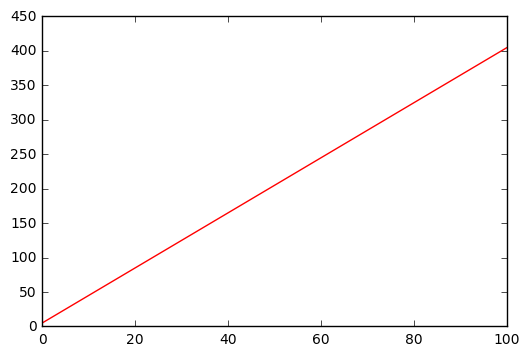

In [3]:
x = linspace(0, 100)
y = 4 * x + 5
plot(x, y, 'r')

Ao analisar o gráfico e a expressão, podemos concluir que a complexidade é linear (representada por uma reta). Entretanto, partes da expressão indicam que uma análise aprofundada pode ser realizada, da seguinte forma: considerando que a parecela $4n$ é dominante em relação à parcela constante $5$, a segunda pode ser desprezada. Assim, a expressão se torna $4n$. Para $n = 100$ a diferença entre $4n+5$ e $4n$ é de $405$ para $400$, ou seja, 1%. O gráfico desta expressão é:

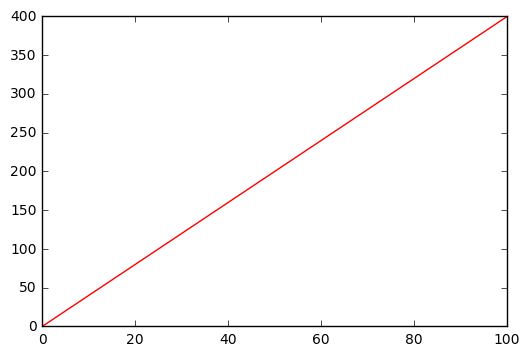

In [4]:
x = linspace(0, 100)
y = 4 * x 
plot(x, y, 'r')

Perceba que esta análise resultou em um gráfico bastante semelhante. Continuando, a expressão $4n$ cresce mais rápido do que $n$, mas sua razão é uma constante $4$. Assim, a constante pode ser considerada como um fator de escala sobre $n$, o que, portanto, não modificará o comportamento do crescimento assintótico da expressão. Simplificando $4n+5$ para $n$ tem-se o gráfico:

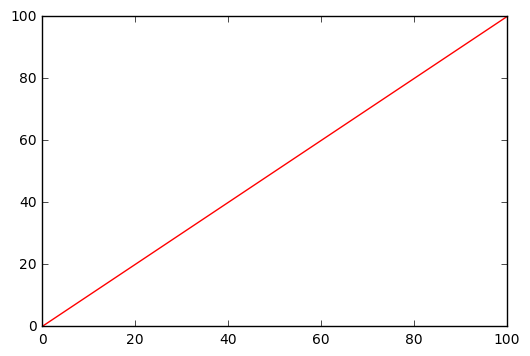

In [5]:
x = linspace(0, 100)
y = x 
plot(x, y, 'r')

Embora a diferença de $4n+5$ para $n$ quando $n = 100$ seja de $405$ para $100$, ou seja, uma diferença de 75%, percebemos que o crescimento não é modificado, ou seja, continua linear.

### Cota Assintótica Superior (CAS)

> Uma **cota assintótica superior** (CAS) é uma função que cresce mais rapidamente do que outra: permanece acima a partir de certo ponto.

Considere, por exemplo, as funções $3n^2$, $n + 5$ e $2^n$ e os seus comportamentos de crescimento:

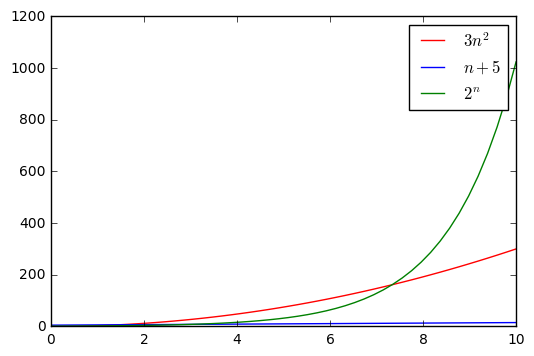

In [6]:
x = linspace(0, 10)
y1 = 3 * (x ** 2)
y2 = x + 5
y3 = 2 ** x
plot(x, y1, 'r', label='$3n^2$')
plot(x, y2, 'b', label='$n+5$')
plot(x, y3, 'g', label='$2^n$')
legend()

Pode-se perceber que $3n^2$ é CAS para $n+5$ para $n$ suficientemente grande. Da mesma forma, $2^n$ é CAS para $3n^2$. Para efeito de notação, chamaremos a função CAS de $g$. Em geral, $g(n)$ é uma CAS sobre $f(n)$ se:

$(\exists n_0 \in \mathbb{N})(\forall n \geq n_0): f(n) \leq g(n)$

Ou seja, $g(n)$ é CAS sobre $f(n)$ se, a partir de um ponto $n_0$, $g(n)$ é sempre maior que $f(n)$.

**Exercício 1.10:** Considerando as funções: $n + 5$, $3n^2$ e $2^n$, sabe-se que $3n^2$ é CAS para $n+5$ e que $2^n$ é CAS para $3n^2$. Determine $n_0$ para cada um destes casos.

**Exercício 1.11:** Para cada um dos seguintes pares de funções $f()$ e $g()$, verique se é possível encontrar uma constante $n_0$ de modo que $g(n)$ seja CAS para $f(n)$:

1. $\log_2(n)$, $n$
2. $5n+7$, $3n^2+1$
3. $2^n$, $3^{n+1}$
4. $2^{n+1}$, $3^n$

Assim, em geral, o cálculo da complexidade de algoritmos concentra-se em determinar a complexidade assintótica da expressão que representa a complexidade do algoritmo. Em outras palavras, ao invés de nos preocuparmos com a expressão ou função exata que representa a complexidade do algoritmo, estaremos mais interessados no comportamento do crescimento da função. 

Para este estudo, as comparações de complexidade assintóticas mais comuns, as quais serão apresentadas nas próximas seções, são:
- $O$ (chamada notação ó)
- $\Theta$ (chamada notação téta)
- $\Omega$ (chamada notação ômega)

### Notação O

Considere as funções $g(n) = n^2$ e $f(n) = 5n + 7$, com seus respectivos gráficos de crescimento:

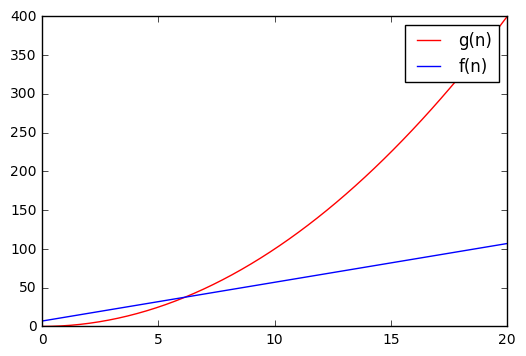

In [7]:
x = linspace(0, 20)
yg = x ** 2
yf = 5 * x + 7
plot(x, yg, 'r', label='g(n)')
plot(x, yf, 'b', label='f(n)')
legend()

Pode-se perceber que $n_0 = 7$ (verifique). Assim, tentemos reduzir $f(n)$ a um fator constante, apenas. Considerando $n \geq 7$ temos: 

\begin{align*}
f(n) &= 5n + 7 &\leq 5 n + n = 6n
\end{align*}

Considerando, então, que a constante é $c = 6$, $n_0 = 7$, $n \geq n_0$, temos que $f(n) \leq c \times g(n)$. Visualmente, temos:

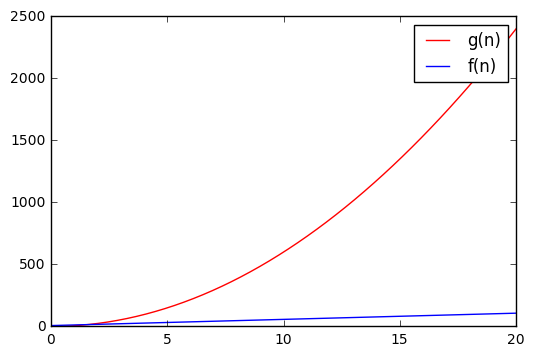

In [8]:
x = linspace(0, 20)
yg = 6 * (x ** 2)
yf = 5 * x + 7
plot(x, yg, 'r', label='g(n)')
plot(x, yf, 'b', label='f(n)')
legend()

Quando é possível encontrar duas constantes $c$ e $n_0$, tal que $n \geq n_0$, obtendo $f(n) \leq c \times g(n)$ dizemos que a função $f(n)$ é $O(g(n))$, ou que $f(n) = O(g(n))$. Formalmente, $f(n) = O(g(n))$ sse:

$(\exists c \in \mathbb{R_+})(\exists n_0 \in \mathbb{N})(\forall n \geq n_0) : f(n) \leq c \times g(n)$

Em outras palavras, para alguma constante $c \in \mathbb{R_+} : c \times g(n)$ é CAS para $f(n)$ ($c$ é real positivo).

> Dizer que a complexidade de um algoritmo é $O(1)$ significa dizer que o **número de operações fundamentais executadas é limitado por uma constante**. Analogamente, $O(n)$ é limitada superiormente por uma função linear $f(n) = c \times g(n)$.

De forma mais detalhada, $g$ não é apenas uma função, mas um conjunto delas. Assim, podemos formalizar $O(g(n))$ como:

$O(g(n)) = \{ f(x) | \mbox{existem constantes positivas } c \mbox{ e } n \mbox{ tais que} f(n) \leq c \times g(n) \mbox{ para todo } n \geq n_0 \}$

As seguintes características de $O$ são importantes:
- No conjunto $O(g(n))$ estão infinitas funções $f(n)$, e cada uma pode ter seu próprio valor para $n_0$ e para a constante $c$;
- Pode-se considerar $O(g(n))$ como uma função (como em uma linguagem de programação) que recebe um parâmetro $g(n)$ e é avaliada de acordo, gerando um conjunto de funções;
- As funções $f(n)$ e $g(n)$ são obrigatoriamente positivas.

As ordens de $O$ mais comuns:
- $O(1)$ - ordem constante
- $O(\log{n})$ - ordem logarítmica
- $O((\log{n})^c)$ - ordem poli-logarítmica
- $O(n)$ - ordem linear
- $O(n \log{n})$ - ordem linear-logarítmica
- $O(n^2)$ - ordem quadrática
- $O(n^3)$ - ordem cúbica
- $O(n^c)$ - ordem polinomial
- $O(c^n)$ - ordem exponencial
- $O(n!)$ - ordem fatorial
- $O(n^n)$ - ordem exponencial

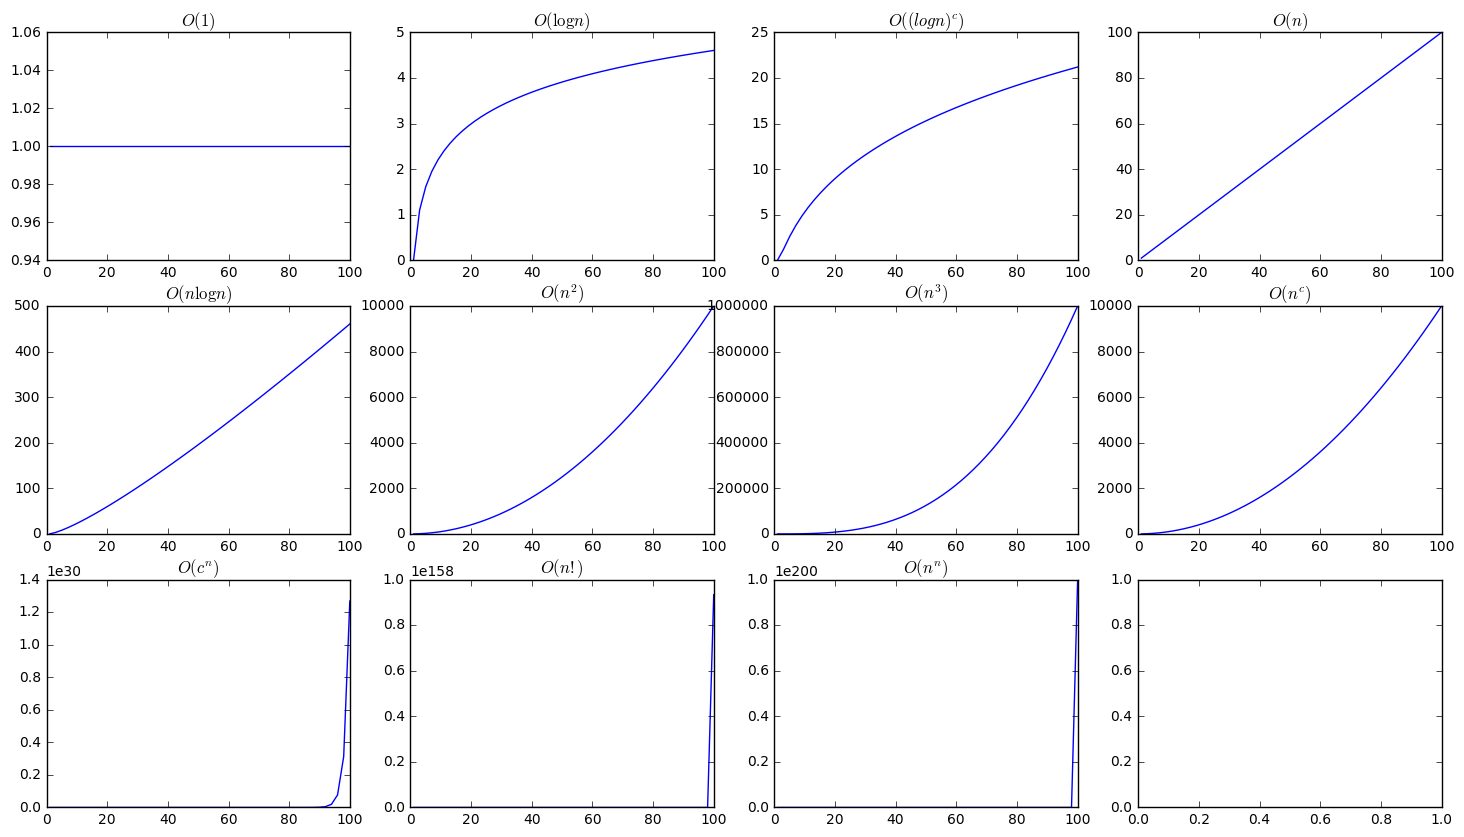

In [9]:
x = linspace(1, 100)
x_const = linspace(1, 1)

fig, axes = plt.subplots(3, 4, figsize=(18, 10))

axes[0,0].plot(x, x_const)
axes[0,0].set_title("$O(1)$")

axes[0,1].plot(x, log(x))
axes[0,1].set_title("$O(\log n)$")

axes[0,2].plot(x, log(x) ** 2)
axes[0,2].set_title("$O((log n)^c)$")

axes[0,3].plot(x, x)
axes[0,3].set_title("$O(n)$")

axes[1,0].plot(x, x * log(x))
axes[1,0].set_title("$O(n \log n)$")

axes[1,1].plot(x, x ** 2)
axes[1,1].set_title("$O(n^2)$")

axes[1,2].plot(x, x ** 3)
axes[1,2].set_title("$O(n^3)$")

axes[1,3].plot(x, x ** 2)
axes[1,3].set_title("$O(n^c)$")

axes[2,0].plot(x, scipy.power(2, x))
axes[2,0].set_title("$O(c ^ n)$")

axes[2,1].plot(x, scipy.misc.factorial(x))
axes[2,1].set_title("$O(n!)$")

axes[2,2].plot(x, scipy.power(x,x))
axes[2,2].set_title("$O(n^n)$")

**Exercício 1.12:** Para cada um dos seguintes pares de funções $f$ e $g$, verifique se é possível encontrar constantes $n_0 \in \mathbb{N}$ e $c \in \mathbb{R_+}$ tais que $(\forall n \geq n_0) : f(n) \leq c \times g(n)$.

1. $10n$, $n^3$
2. $7n^2$, $n^3 \log_2{n}$
3. $2^n n^2$, $n3^n$

Pode-se determinar a **ordem de um polinômio** a partir de seu grau. Por exemplo, considere o polinômio:

$k(n) = n^3 + 3n^2 + 7n + 5$, para $n \geq 1$, os quatro fatores são analisados assim:

1. fator $n^3 = 1n^3$
2. fator $3n^2 \leq 3n^3$
3. fator $7n \leq 7n^3$
4. fator $5 \leq 5n^3$

Assim, pode-se resumir o polinômio a:

$k(n) = (1+3+7+5)n^3 = 16n^3$

De forma geral, para um polinômio:

$p(n) = a_m n^m + ... + a_1 n + a_0$ 

de grau $m$, seu valor absoluto $|p(n)|$ é $O(n^m)$.

**Exercício 1.13:** Considerando o polinômio quadrático $q(n) = 5n^2 + 7n + 3$, mostre que $q(n) = O(n^2)$, determinando as constantes $n0 \in \mathbb{N}$ e $c \in \mathbb{R_+}$ tais que $q(n) \leq c \times n^2$, para todo $n \geq n_0$.

**Propriedades**

1. *Transitividade*: Se $f(n) = O(g(n))$ e $g(n) = O(h(n))$, então $f(n) = O(h(n))$;
2. *Reflexividade*: Se $f(n) = O(f(n))$; e
3. *Simetria*: Se $f(n) = O(g(n))$, então $g(n) = O(f(n))$.

### Notação $\Omega$

Enquanto a notação $O$ permite especificar um conjunto de funções que são *cota assintótica superior* para uma função $f$, a notação $\Omega$ define um conjunto de funções que são *cota assintótica inferior* para uma função $f$. Neste caso, podemos dizer que $f(n)$ é limitada a inferior por $\Omega(g(n))$. A definição formal é a seguinte:

$\Omega(g(n)) = \{ f(n) | \mbox{existem constantes } c \mbox{ e } n_0 \mbox{ tais que} \\ f(n) \geq c \times g(n), \mbox{ para todo } n \geq n_0 \}$

### Notação $\Theta$

A notação $\Theta$ permite especificar um conjunto de funções que são $O$ e $\Omega$ *cota assintótica exata*, ou seja, quando duas funções crescem com a mesma rapidez a partir de um certo ponto. Formalmente, dizemos que:

$\Theta(g(n)) = \{f(n) | \mbox{existem constantes } c_1 \mbox{ , } c_2 \mbox{ e } n_0 \mbox{ tais que} \\ c_1 \times g(n) \leq f(n) \wedge f(n) \leq c_2 \times g(n) \\ \mbox{para todo } n \geq n_0 \}$

**Exercício 1.14:** Considere o algoritmo `Particiona()` abaixo:

``` java
Particiona(A, m, k)
v = A[m]
i = m + 1
j = k
repita
    enquanto A[i] <= v faça 
        i = i + 1
    fim-enquanto
    
    enquanto A[j] >= v faça 
        j = j - 1 
    fim-enquanto
    
    se i < j então
        troca(A[i], A[j])
    fim-se
até-que ( i > j )
A[m] = A[j]
A[j] = v
retorne (j, A)
```

Os argumentos `m` e `k` são apontadores que, respectivamente, iniciam na primeira e na última posição de `A`. O objetivo do algoritmo, usado pelo algoritmo de ordenação *Quicksort* é particionar os elementos de um vetor, movimentando-os de tal forma que, no final, todos os elementos à direita do pivô  sejam maiores ou iguais a ele, enquanto os elementos à sua esquerda são menores que ele. O pivô é o primeiro elemento do vetor.

Execute manualmente o algoritmo `Particiona()` sobre as entradas:
1. `A = [10, 20, 30, 40, 50, 60]`
2. `A = [65, 70, 75, 80, 85, 60, 55, 50, 45, 90]` 

Apresente as saídas para cada caso.

**Exercício 1.15:** Considere o algoritmo `Particiona()`, definido acima. Tome como o tamanho da entrada o número de elementos do vetor e como operação fundamental a comparação de elementos de `A`. Cada elemento do vetor `A` será comparado com `v` exatamente uma vez. Mostre que a complexidade, portanto, é linear, isto é, $\Theta(n)$, onde $n$ é o número de elementos de `A`.